In [19]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from mlxtend.plotting import plot_decision_regions

from sklearn import tree

import joblib

import matplotlib.pyplot as plt

In [20]:
feature = pd.read_csv(r'../input/feature/feature.csv', index_col=0)
feature.head(10)

,ApEn,peek,RMS,mean frequency,label
0,0.067594,9,472.682642,3.5,1
1,0.037022,10,155.184031,5.0,1
2,0.009688,9,304.301872,5.5,1
3,0.029392,12,558.420084,7.5,1
4,0.052558,7,151.881867,3.0,1
5,0.014919,11,138.696101,3.5,1
6,0.028359,11,434.538039,11.5,1
7,0.017113,13,231.930831,3.0,1
8,0.029919,9,177.993019,1.5,1
9,0.029906,16,531.765711,15.5,1


In [53]:
x_train,x_test,y_train,y_test = train_test_split(feature[['mean frequency', 'RMS']], feature['label'], test_size=0.3, random_state=0)
x_train.to_csv('x_train.csv')
y_train.to_csv('y_train.csv')
x_test.to_csv('x_test.csv')
y_test.to_csv('y_test.csv')
x_train = StandardScaler().fit_transform(x_train)

In [54]:
search_model = GridSearchCV(SVC(kernel='rbf'), {'C':[0.1, 1, 10], 'gamma':[1, 0.1, 0.01]}, cv=4)
search_model.fit(x_train, y_train)
for p, s in zip(search_model.cv_results_['params'], search_model.cv_results_['mean_test_score']):
    print(p, s)

print(search_model.best_params_)

print(search_model.best_score_)
print(search_model.best_estimator_)

print(classification_report(y_test, search_model.predict(StandardScaler().fit_transform(x_test))))

{'C': 0.1, 'gamma': 1} 0.9592546558700454
{'C': 0.1, 'gamma': 0.1} 0.9481987854294995
{'C': 0.1, 'gamma': 0.01} 0.9325468574543795
{'C': 1, 'gamma': 1} 0.9636025130883847
{'C': 1, 'gamma': 0.1} 0.9586331983261879
{'C': 1, 'gamma': 0.01} 0.9475776982417468
{'C': 10, 'gamma': 1} 0.9648448726419427
{'C': 10, 'gamma': 0.1} 0.9599997506268895
{'C': 10, 'gamma': 0.01} 0.9540372642436488
{'C': 10, 'gamma': 1}
0.9648448726419427
SVC(C=10, gamma=1)
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2785
           1       0.90      0.92      0.91       665

    accuracy                           0.96      3450
   macro avg       0.94      0.95      0.94      3450
weighted avg       0.96      0.96      0.96      3450



In [55]:
print(classification_report(y_test, search_model.predict(StandardScaler().fit_transform(x_test))))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2785
           1       0.90      0.92      0.91       665

    accuracy                           0.96      3450
   macro avg       0.94      0.95      0.94      3450
weighted avg       0.96      0.96      0.96      3450



['EEG_svm.m']

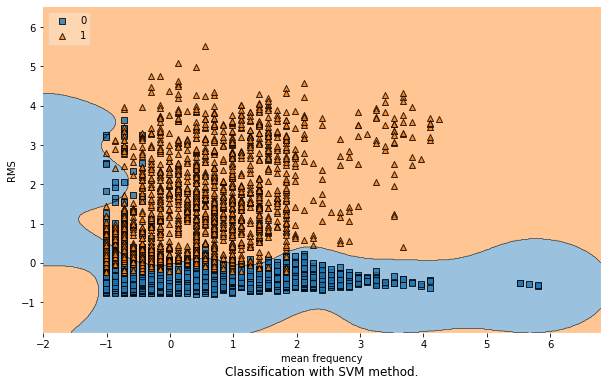

In [56]:
plt.figure(figsize = (10,6))
plot_decision_regions(np.array(x_train), np.array(y_train), clf=search_model, legend=2)

plt.xlabel('mean frequency')
plt.ylabel('RMS')
plt.title('Classification with SVM method.', y=-0.15)
plt.savefig('SVM.png', dpi=600)
plt.savefig('SVM.pdf')
joblib.dump(search_model, "EEG_svm.m")

## Decision tree

In [45]:
x_dttrain,x_dttest,y_dttrain,y_dttest = train_test_split(feature[['ApEn', 'RMS', 'mean frequency']], feature['label'], test_size=0.3, random_state=0)

x_dttrain.to_csv('x_dttrain.csv')
y_dttrain.to_csv('y_dttrain.csv')
x_dttest.to_csv('x_dttest.csv')
y_dttest.to_csv('y_dttest.csv')

In [46]:
dtree = tree.DecisionTreeClassifier(random_state=30, max_depth=3, min_samples_leaf=100, min_samples_split=100) #实例化
dtree = dtree.fit(x_dttrain,y_dttrain) 
result = dtree.score(x_dttest,y_dttest)
print(result)

0.9585507246376812


['EEG_dtree.m']

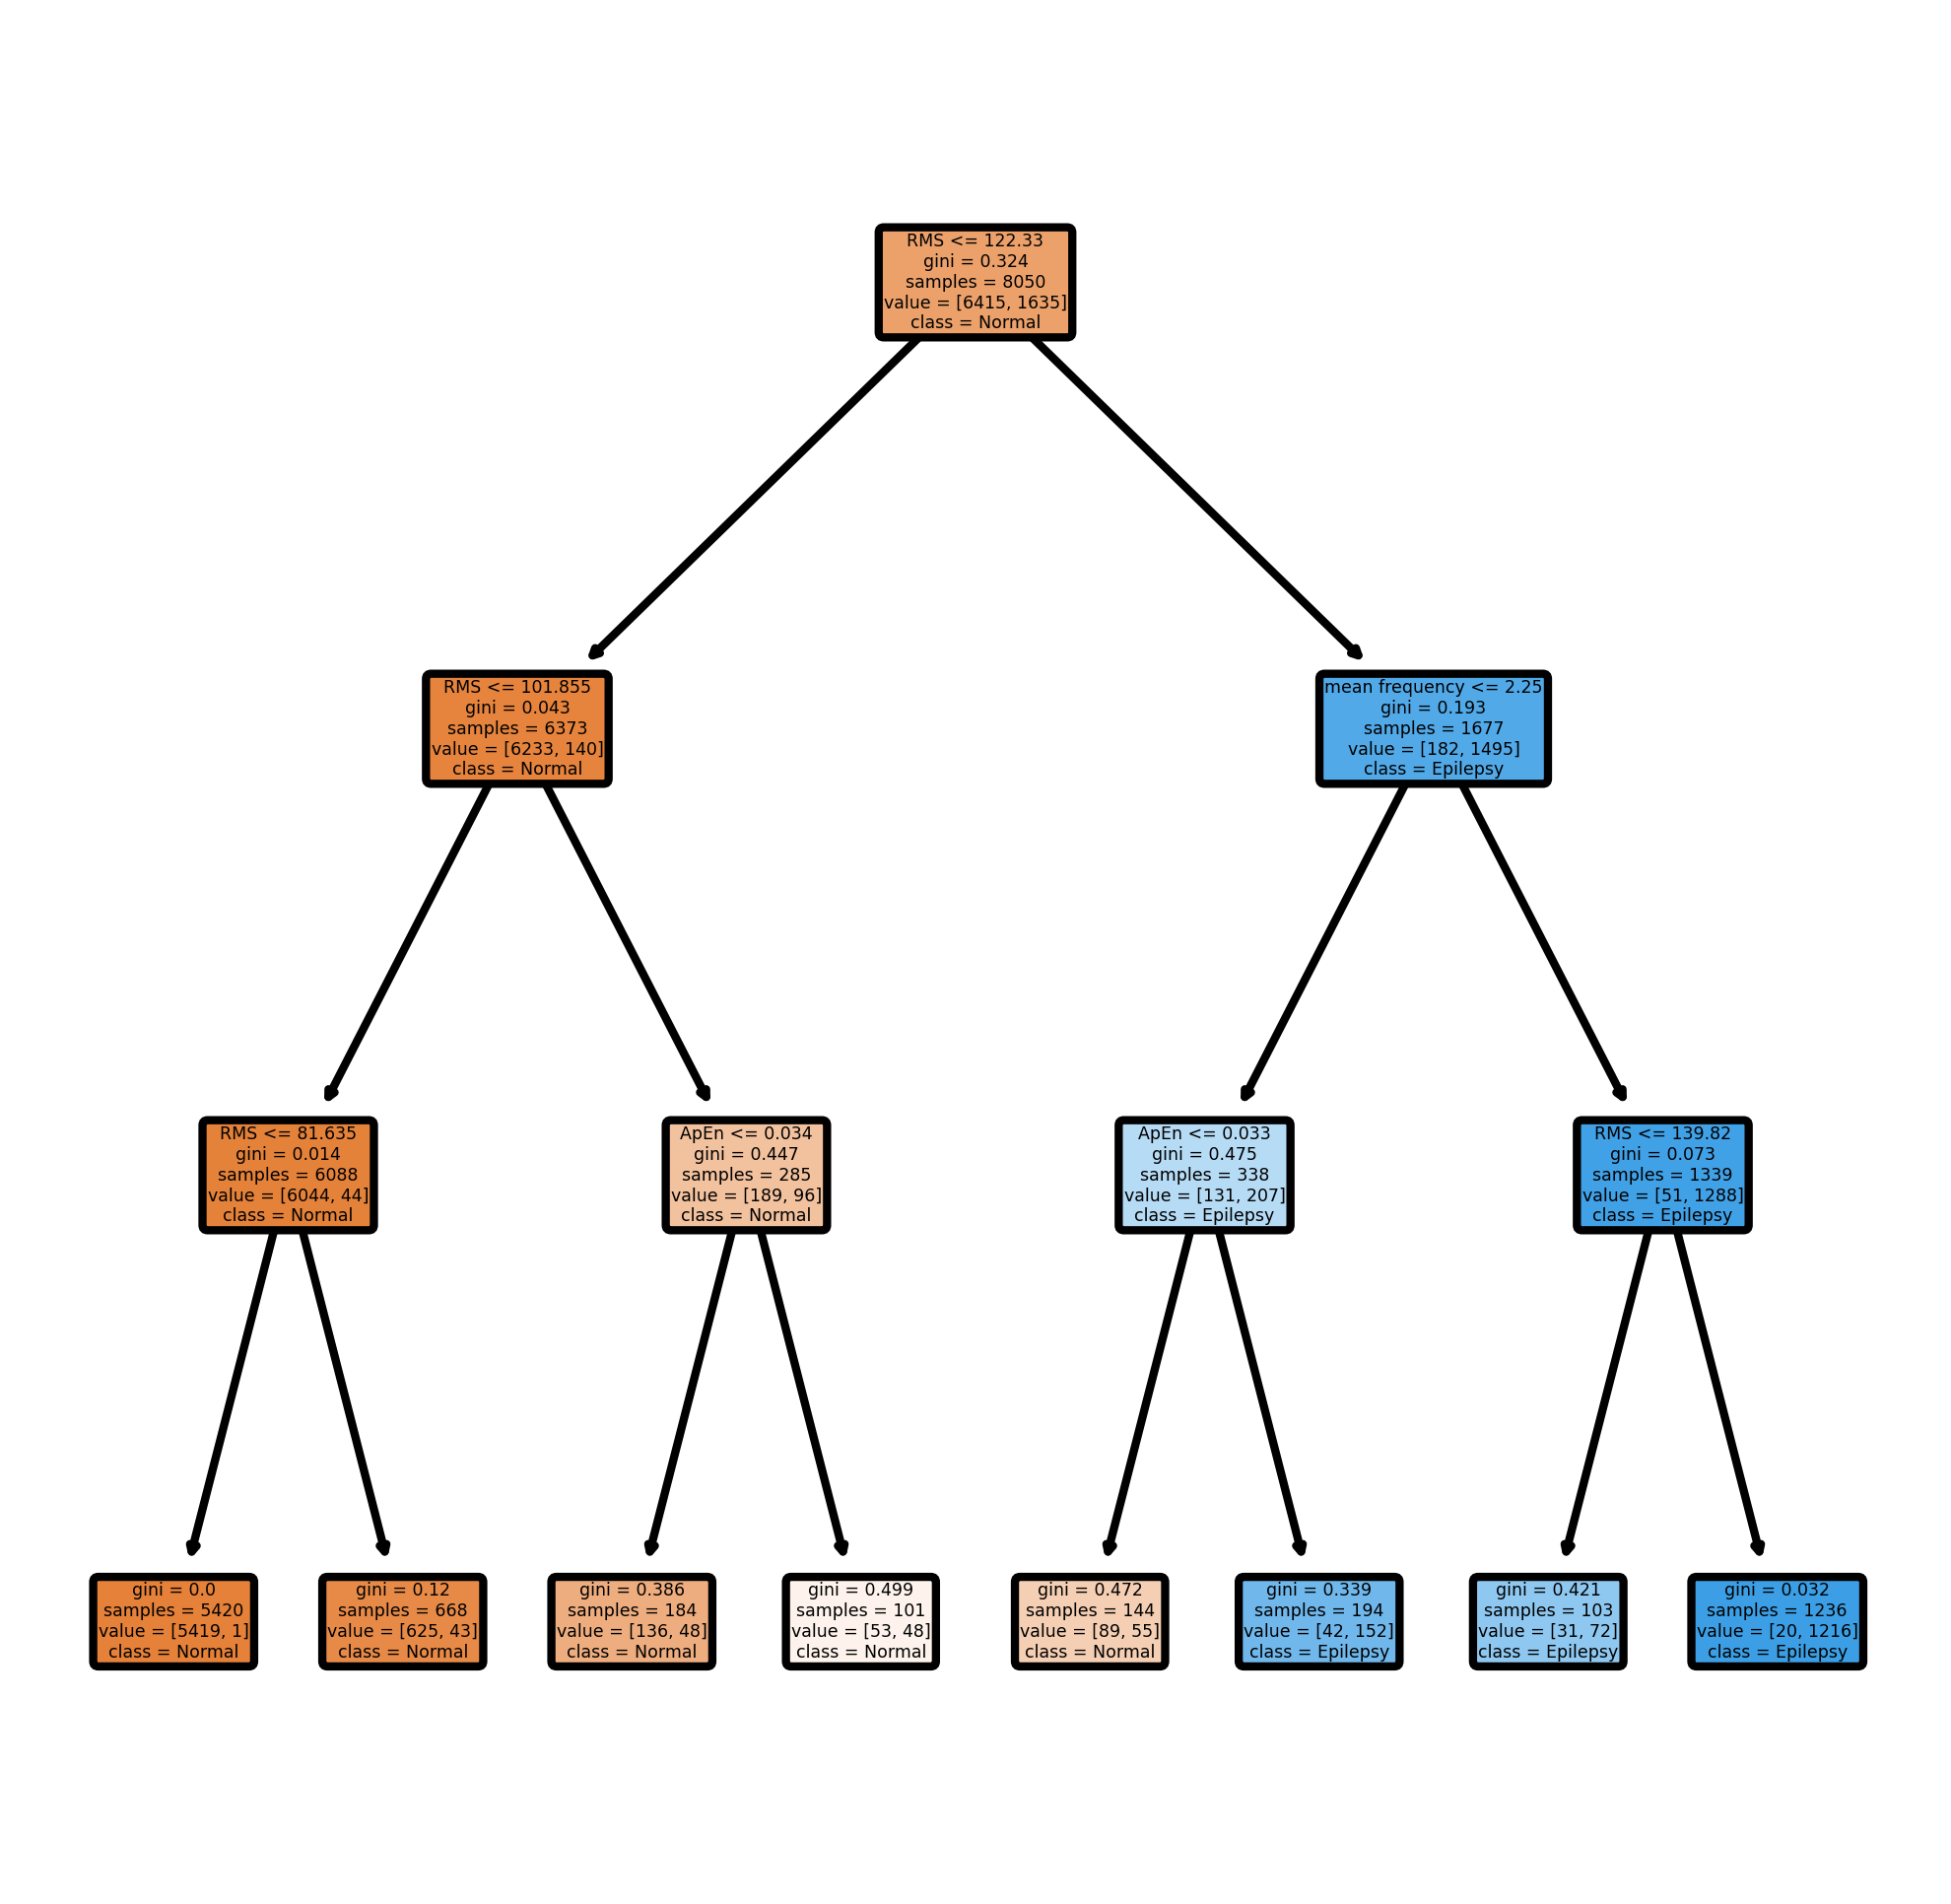

In [47]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
fn = ['ApEn', 'RMS', 'mean frequency']
tree.plot_tree(dtree,
               feature_names = fn, 
               class_names=['Normal', 'Epilepsy'],
               filled = True, rounded=True)
fig.savefig('Decision tree.png', dpi=600)
fig.savefig('Decision tree.pdf')
joblib.dump(dtree, "EEG_dtree.m")

In [43]:
print(classification_report(y_dttest, dtree.predict(x_dttest)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2785
           1       0.93      0.88      0.90       665

    accuracy                           0.96      3450
   macro avg       0.95      0.93      0.94      3450
weighted avg       0.96      0.96      0.96      3450



In [44]:

dtree.feature_importances_
[*zip(fn,dtree.feature_importances_)]

[('ApEn', 0.0),
 ('peek', 0.03885787561867085),
 ('RMS', 0.9611421243813291),
 ('mean frequency', 0.0)]